In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import feather
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import RandomState

import abm
%load_ext autoreload
%autoreload 2

In [2]:
df_employee = pd.read_csv('../data_clean/labor_employee.csv', header=0)
df_employer = pd.read_csv('../data_clean/labor_employer_occ5.csv', header=0)

In [3]:
# ---- Prepare xx ----
df_xx = (df_employee
      [["educ", "age", "nonwhite"]])
df_xx.insert(0, "intercept", 1)

# ---- Prepare ww ----
df_ww = df_employer.loc[:, ['pres', 'aut']]

n_i = df_xx.shape[0]
p_i = df_xx.shape[1]
n_j = df_ww.shape[0]
p_j = df_ww.shape[1]

# Simulate based on real data

In [4]:
# Create employers
rng_beta = RandomState(1)
# true_beta = rng_beta.multivariate_normal(mean=[-15, 0.5, 0.2,  2],
#                                          cov=[[3, 0, 0, 0], 
#                                               [0, 0.15, 0, 0],
#                                               [0, 0, 0.1, 0],
#                                               [0, 0, 0, 0.5]],
#                                          size=n_j)
rng = RandomState(1)
true_beta = np.array([[0, 0, 0, 0],
                      [-24, 1.3, 0.1, 1],
                      [-22, 1, 0.2, 1],
                      [-9, 0.75, -0.05, 0],
                      [-8, 0.5, 0.02, 0],
                      [-6, 0.5, -0.01, 1]])
employer_list = [abm.Employer(w=df_ww.loc[j, :], beta=true_beta[j, :], rng=rng) for j in range(n_j)]

In [5]:
# Create employees
true_alpha = np.array([0.1, 1])
employee_list = [abm.Employee(x=df_xx.loc[i, :], alpha=true_alpha, rng=rng) for i in range(n_i)]

In [6]:
my_model = abm.Model(employer_list, employee_list)
my_alpha, beta, ww, xx, choice, true_opp, obs_opp = \
    my_model.matching_process(employer_list=employer_list, employee_list=employee_list)
wa = np.array([ee.wa for ee in employee_list])

In [7]:
pd.DataFrame(obs_opp).describe()

,0,1,2,3,4,5
count,2149.0,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,1.0,0.160074,0.018613,0.130293,0.124709,0.222894
std,0.0,0.366760,0.135186,0.336704,0.330466,0.416285
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
feather.write_dataframe(pd.DataFrame(ww), "ww_nojobs.feather")
feather.write_dataframe(pd.DataFrame(xx), "xx_nojobs.feather")
feather.write_dataframe(pd.DataFrame(true_opp), "true_opp_nojobs.feather")
feather.write_dataframe(pd.DataFrame(obs_opp), "obs_opp_nojobs.feather")
feather.write_dataframe(pd.DataFrame(choice), "choice_nojobs.feather")
# feather.write_dataframe(pd.DataFrame(wa), "wa_nojobs.feather")

# Preference parameters
feather.write_dataframe(pd.DataFrame(true_alpha), "true_alpha_nojobs.feather")
feather.write_dataframe(pd.DataFrame(true_beta), "true_beta_nojobs.feather")

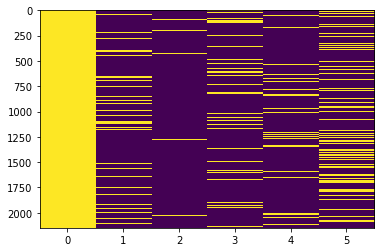

In [9]:
plt.imshow(obs_opp, aspect="auto")

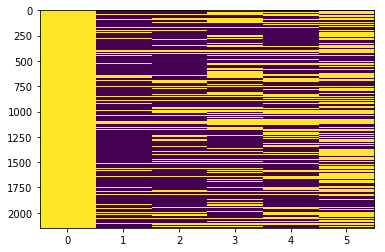

In [10]:
plt.imshow(true_opp, aspect="auto")